In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import ast

In [43]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel and Csv\Captostone Project\movies_metadata.csv",low_memory=False)

In [44]:
pd.set_option('display.max_columns',None)

In [45]:
df2 = df.copy()

In [46]:
df2.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [47]:
df2.duplicated().sum()

17

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
obvar = df2.select_dtypes(include = 'object')

In [9]:
df2['adult'].value_counts(),df2['video'].value_counts()

(adult
 False                                                                                                                             45454
 True                                                                                                                                  9
  - Written by Ørnås                                                                                                                   1
  Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
  Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Name: count, dtype: int64,
 video
 False    45367
 True        93
 Name: count, dtype: int64)

In [10]:
df2 = df2.drop(columns = ['adult','homepage','id','imdb_id','video','belongs_to_collection','poster_path','tagline'])

In [11]:
df2.isnull().sum()

budget                    0
genres                    0
original_language        11
original_title            0
overview                954
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
vote_average              6
vote_count                6
dtype: int64

In [12]:
CorruptedRows = df2[df2['budget'].str.contains('jpg', na = False)]
CorruptedRows

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
19730,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df2.loc[CorruptedRows.index,'budget'] = np.nan

In [14]:
df2['budget'] = pd.to_numeric(df2['budget'],errors = 'coerce')

In [15]:
df2['budget'] = df2['budget'].fillna(df2['budget'].median())

In [16]:
df2['genres'] = df2['genres'].apply(lambda x: ', '.join([i['name'] for i in ast.literal_eval(x)]) if isinstance(x,str) else 'No Genre Specified')

In [17]:
CorruptCompanies = df2[df2['production_companies'].str.contains('True' or 'False',na = False)]

In [18]:
df2.loc[CorruptCompanies.index,'production_companies'] = np.nan

In [19]:
df2['production_companies'] = df2['production_companies'].fillna(df2['production_companies'].mode()[0])

In [20]:
def ProductionCompanies(x):
    if pd.isna(x) or isinstance(x, bool):
        return 'No Companies Specified'
    try:
        parsed = ast.literal_eval(x) if isinstance(x, str) else x
        return ', '.join([i['name'] for i in parsed]) if isinstance(parsed, list) else 'No Companies Specified'
    except (ValueError, SyntaxError, TypeError):
        return 'No Companies Specified'
df2['production_companies'] = df2['production_companies'].apply(ProductionCompanies)

In [21]:
df2['release_date'] = df2['release_date'].fillna(df2['release_date'].mode())[0]

In [22]:
df2['release_date'] = pd.to_datetime(df2['release_date'])

In [23]:
df2['Release_Year'] = df2['release_date'].dt.year
df2['Release_Date'] = df2['release_date'].dt.day
df2['Release_Month'] = df2['release_date'].dt.month

In [24]:
df2 = df2.drop(columns = 'release_date')

In [25]:
df2

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Release_Year,Release_Date,Release_Month
0,30000000.0,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995,30,10
1,65000000.0,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,1995,30,10
2,0.0,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0,1995,30,10
3,16000000.0,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0,1995,30,10
4,0.0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0,1995,30,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0.0,"Drama, Family",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,4.0,1.0,1995,30,10
45462,0.0,Drama,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,Sine Olivia,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,9.0,3.0,1995,30,10
45463,0.0,"Action, Drama, Thriller",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,3.8,6.0,1995,30,10
45464,0.0,,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0,87.0,[],Released,Satan Triumphant,0.0,0.0,1995,30,10


In [26]:
CorrRows = df2[df2['popularity'].str.contains('Beware Of Frost Bites',na = False)]
df2.loc[CorrRows.index,'popularity'] = np.nan

In [27]:
df2['popularity'] = df2['popularity'].fillna(df2['popularity'].mode()[0])

In [28]:
df2['popularity'] = pd.to_numeric(df2['popularity'])

In [29]:
def ProductionCountries(x):
    if pd.isna(x) or isinstance(x, float):
        return 'No Country Specified'
    try:
        parsed = ast.literal_eval(x) if isinstance(x, str) else x
        return ', '.join([i['name'] for i in parsed]) if isinstance(parsed, list) else 'No Country Specified'
    except (ValueError, SyntaxError, TypeError):
        return 'No Countries Specified'
df2['production_countries'] = df2['production_countries'].apply(ProductionCountries)

In [30]:
df2['spoken_languages'] = df2['spoken_languages'].apply(lambda x: ', '.join([i['name'] for i in ast.literal_eval(x)]) if isinstance(x,str) else 'No Language Specified')

In [31]:
df2 = df2.copy()
df2['genres'] = df2['genres'].fillna('No Genre Specified')
df2['production_companies'] = df2['production_companies'].fillna('Unknown')
df2['production_countries'] = df2['production_countries'].fillna('Unknown')
df2['spoken_languages'] = df2['spoken_languages'].fillna('Unknown')
df2['budget'] = df2['budget'].fillna(0)
df2['revenue'] = df2['revenue'].fillna(0)
df2['runtime'] = df2['runtime'].fillna(df2['runtime'].median())
df2['overview'] = df2['overview'].fillna('No overview available')

In [32]:
df2['original_language'] = df2['original_language'].fillna(df2['original_language'].mode())[0]
df2['status'] = df2['status'].fillna(df2['status'].mode())[0]
df2['title'] = df2['title'].fillna(df2['title'].mode())[0]
df2['vote_average'] = df2['vote_average'].fillna(df2['vote_average'].median())
df2['vote_count'] = df2['vote_count'].fillna(df2['vote_count'].median())

In [33]:
numvar = df2.select_dtypes(include = ['int','float'])
numvar

,budget,popularity,revenue,runtime,vote_average,vote_count,Release_Year,Release_Date,Release_Month
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,1995,30,10
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,1995,30,10
2,0.0,11.712900,0.0,101.0,6.5,92.0,1995,30,10
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,1995,30,10
4,0.0,8.387519,76578911.0,106.0,5.7,173.0,1995,30,10
...,...,...,...,...,...,...,...,...,...
45461,0.0,0.072051,0.0,90.0,4.0,1.0,1995,30,10
45462,0.0,0.178241,0.0,360.0,9.0,3.0,1995,30,10
45463,0.0,0.903007,0.0,90.0,3.8,6.0,1995,30,10
45464,0.0,0.003503,0.0,87.0,0.0,0.0,1995,30,10


In [34]:
df2.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,Release_Year,Release_Date,Release_Month
count,4.546600e+04,45466.000000,4.546600e+04,45466.000000,45466.000000,45466.000000,45466.0,45466.0,45466.0
mean,4.224300e+06,2.921093,1.120787e+07,94.133242,5.618258,109.884155,1995.0,30.0,10.0
std,1.742359e+07,6.005112,6.432813e+07,38.296618,1.924094,491.279294,0.0,0.0,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1995.0,30.0,10.0
25%,0.000000e+00,0.385804,0.000000e+00,85.000000,5.000000,3.000000,1995.0,30.0,10.0
50%,0.000000e+00,1.127410,0.000000e+00,95.000000,6.000000,10.000000,1995.0,30.0,10.0
75%,0.000000e+00,3.678343,0.000000e+00,107.000000,6.800000,34.000000,1995.0,30.0,10.0
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1995.0,30.0,10.0


<Axes: >

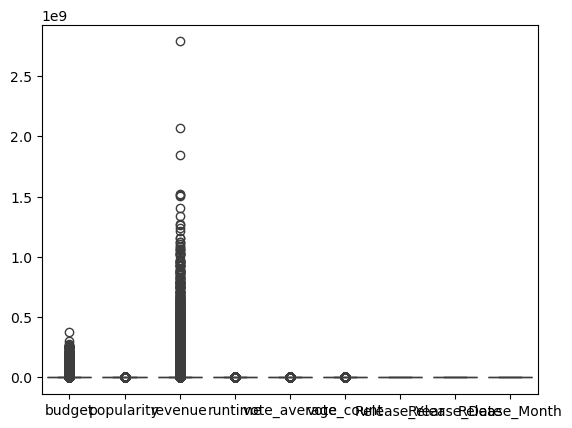

In [35]:
sns.boxplot(numvar)


<Axes: ylabel='revenue'>

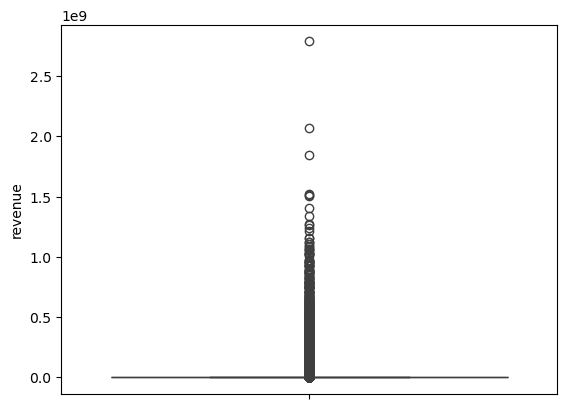

In [37]:
sns.boxplot(df2['revenue'])

In [38]:
def Outliers(df,columns):
    for i in columns:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[df[i] > upperlimit,i] = upperlimit
        df.loc[df[i] < lowerlimit,i] = lowerlimit
    return df
cols = ['popularity', 'runtime', 'vote_average','vote_count', 'Release_Year', 'Release_Date', 'Release_Month']
df2 = Outliers(df2,cols)

In [39]:
df2

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Release_Year,Release_Date,Release_Month
0,30000000.0,"Animation, Comedy, Family",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",8.617151,Pixar Animation Studios,United States of America,373554033.0,81.0,English,Released,Toy Story,7.7,80.5,1995,30,10
1,65000000.0,"Adventure, Fantasy, Family",en,Jumanji,When siblings Judy and Peter discover an encha...,8.617151,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,262797249.0,104.0,"English, Français",Released,Toy Story,6.9,80.5,1995,30,10
2,0.0,"Romance, Comedy",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,8.617151,"Warner Bros., Lancaster Gate",United States of America,0.0,101.0,English,Released,Toy Story,6.5,80.5,1995,30,10
3,16000000.0,"Comedy, Drama, Romance",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,81452156.0,127.0,English,Released,Toy Story,6.1,34.0,1995,30,10
4,0.0,Comedy,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,76578911.0,106.0,English,Released,Toy Story,5.7,80.5,1995,30,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0.0,"Drama, Family",en,رگ خواب,Rising and falling between a man and woman.,0.072051,,Iran,0.0,90.0,فارسی,Released,Toy Story,4.0,1.0,1995,30,10
45462,0.0,Drama,en,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,Sine Olivia,Philippines,0.0,140.0,,Released,Toy Story,9.0,3.0,1995,30,10
45463,0.0,"Action, Drama, Thriller",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,American World Pictures,United States of America,0.0,90.0,English,Released,Toy Story,3.8,6.0,1995,30,10
45464,0.0,,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,Yermoliev,Russia,0.0,87.0,,Released,Toy Story,2.3,0.0,1995,30,10


In [40]:
df2.to_csv('Output.csv')

PermissionError: [Errno 13] Permission denied: 'Output.csv'

<Axes: ylabel='vote_average'>

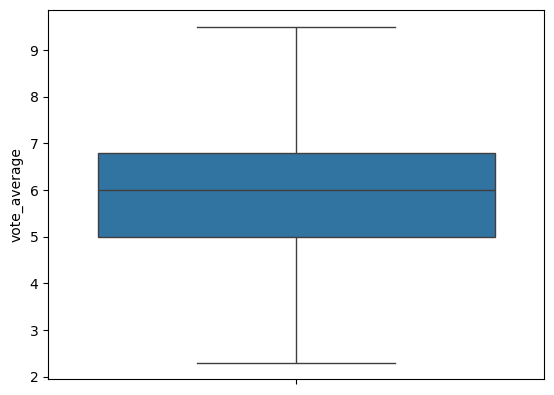

In [41]:
sns.boxplot(df2['vote_average'])